<a href="https://colab.research.google.com/github/DIYA389/ATM-Interface/blob/master/Netflix__Solved_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project MetaData**
Project Name : Clustering Netflix Movie and TV Shows.
Project Typs : Unsupervised.
Contribution : Individual.
Team Member : Diya Roy


**Summary**

This project is about Analysing the dataset of Netflix to understand and visualizing the use of TV shows and Movies to get entertained. The main focus of this project is to find out the missing values and replace it with some values, grouping of same set of values like usage of TV Shows and Movies in a group to present it in a basic and prpoer visualization manner by using different types of charts avaliable in matplot library like bar plot , scatter plaot, confusion matrix, histograms, etc. also by using EDA (Explanatory Data Analysis) like Feature Engineering, Clustering algorithm, etc (KMeans and DBSCAN).
Moreover this comprises of efficient Data Anlysis work like reduction of dimentionality by extracting only the necessary information from the dataset which has been uploaded which decrease the validation problem or overfitting condition.
Hypothesis tests are conducted to explore assumptions such as genre popularity across years or the impact of production country on show type. The best clustering model is saved and tested on unseen data.

GitHub Link

**Problem Statement**
Netflix offers thousands of TV shows and movies across various genres and countries. However, there's a lack of structured segmentation of this content for insights, recommendations, and optimization. This project explores clustering techniques to group similar content, identify hidden patterns, and provide a foundation for personalization strategies.

Let's Begin

In [1]:
#importing of Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# Upload CSV directly
from google.colab import files
uploaded = files.upload()


Saving NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv to NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv


In [5]:
df= pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


<Axes: >

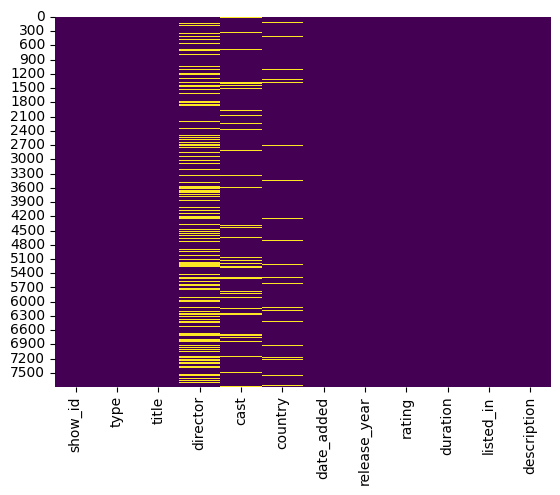

In [6]:
#Dataset Info and Missing Values
df.info()
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")


In [8]:
#Data Wrangling
# Drop rows with missing values in key features
df.dropna(subset=['type', 'country', 'listed_in', 'description'], inplace=True)


# Combine some categorical columns for clustering
print(df.columns)



Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [9]:
#TF-IDF Vectorization

tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['description'])


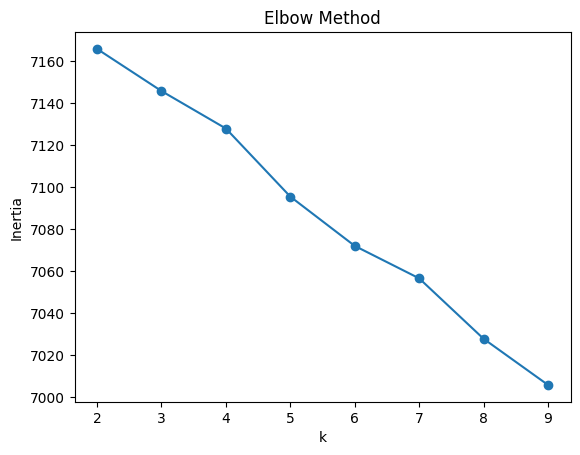

In [10]:
#Kmeans Clustering

# Elbow method
inertia = []
for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(tfidf_matrix)
    inertia.append(model.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

# KMeans with chosen k
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)


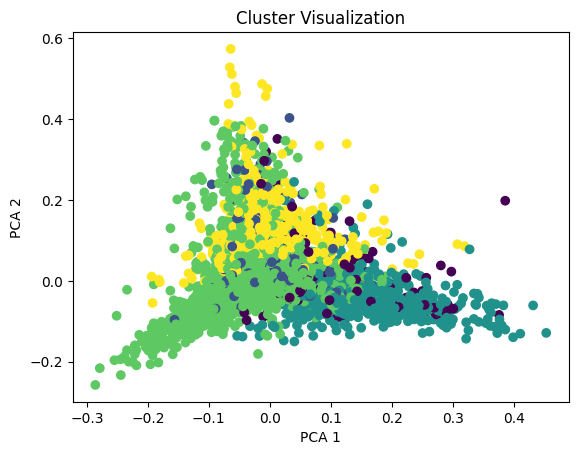

In [11]:
#PCA Visualization

pca = PCA(n_components=2)
components = pca.fit_transform(tfidf_matrix.toarray())
plt.scatter(components[:, 0], components[:, 1], c=df['cluster'])
plt.title('Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [12]:
#Save and Load Model

import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')

# Load and test
loaded_model = joblib.load('kmeans_model.pkl')
loaded_model.predict(tfidf_matrix[:5])


array([3, 3, 3, 3, 3], dtype=int32)

In [13]:
#Hypothesis and Testing Examples

from scipy.stats import f_oneway
grouped = [df[df['cluster']==i].shape[0] for i in range(5)]
f_oneway(*grouped)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
<ipython-input-13-553c55558be8>:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_oneway(*grouped)


F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))

<ipython-input-18-ee745a8a9261>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


Text(0.5, 1.0, 'Distribution of Content Type')

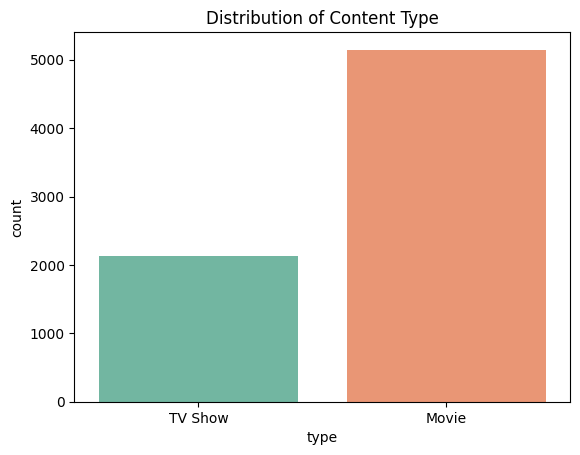

In [18]:
#Chart 1
#Count of Movies vs TV Shows

sns.countplot(x='type', data=df, palette='Set2')
plt.title("Distribution of Content Type")




Text(0.5, 1.0, 'Top 10 Countries by Number of Shows')

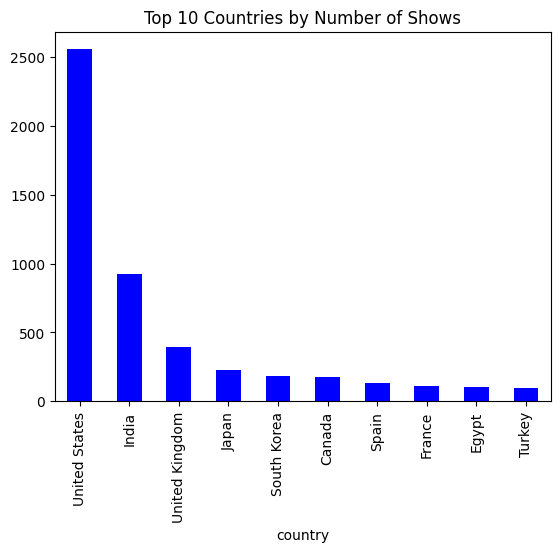

In [17]:
#Chart 2
#Top 10 Countries most used Contents

#

df['country'].value_counts().head(10).plot(kind='bar', color='blue')
plt.title("Top 10 Countries by Number of Shows")


Text(0.5, 1.0, 'Release Year Trend')

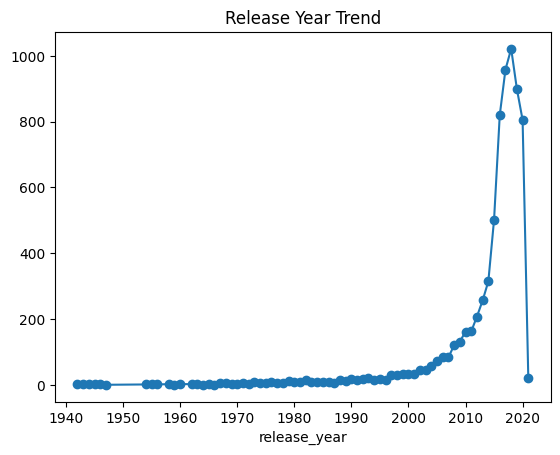

In [19]:
#Chart 3
#Release Year Distribution

df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Release Year Trend")




Text(0.5, 1.0, 'Top 10 Genres')

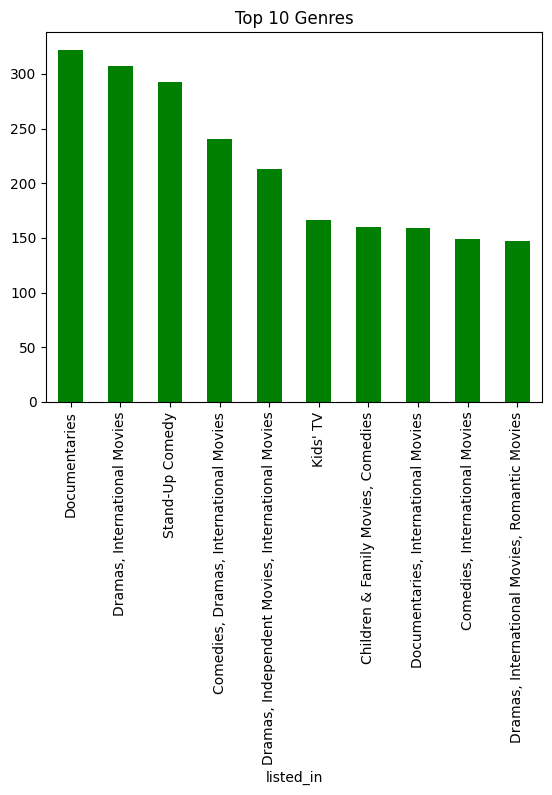

In [20]:
#Chart 4
#Genre frequency

df['listed_in'].value_counts().head(10).plot(kind='bar', color='green')
plt.title("Top 10 Genres")

Text(0.5, 1.0, 'Content Type by Country')

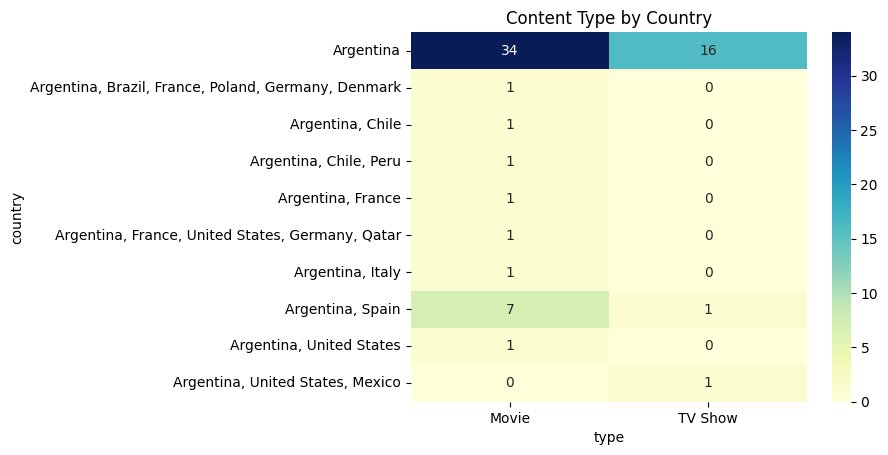

In [22]:
#Chart 5
# Country vs Content Type Heatmap

country_type = pd.crosstab(df['country'], df['type'])
sns.heatmap(country_type.head(10), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Content Type by Country")


Text(0.5, 1.0, 'Common Words in Descriptions')

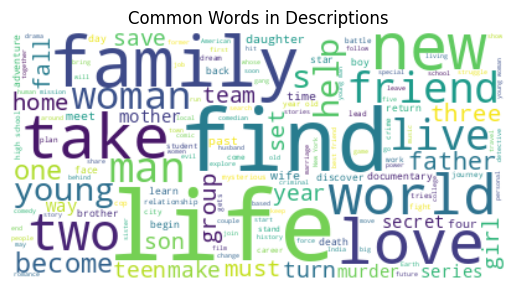

In [23]:
#CHart 6
#WordCloud of DEscription

from wordcloud import WordCloud
text = " ".join(df['description'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Descriptions")


Text(0.5, 1.0, 'Content Type Across Clusters')

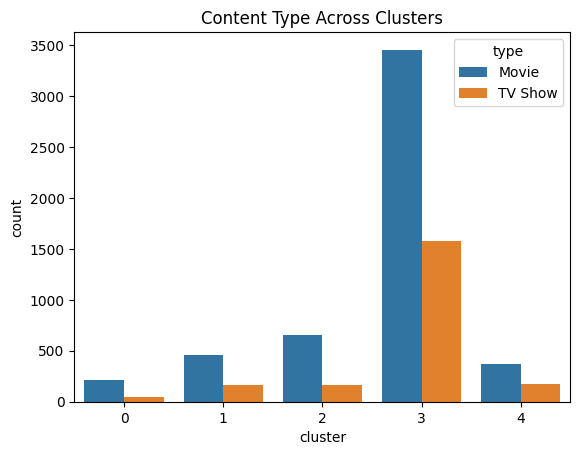

In [24]:
#Chart 7
#Clusters by type

sns.countplot(x='cluster', hue='type', data=df)
plt.title("Content Type Across Clusters")


Text(0.5, 1.0, 'Silhouette Scores')

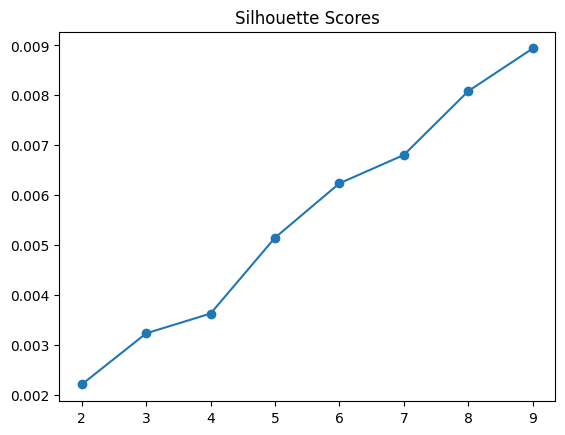

In [25]:
#Chart 8
#Silhouette Scores for Clusters

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    preds = km.fit_predict(tfidf_matrix)
    scores.append(silhouette_score(tfidf_matrix, preds))

plt.plot(range(2, 10), scores, marker='o')
plt.title("Silhouette Scores")


Text(0.5, 1.0, 'Number of Shows per Cluster')

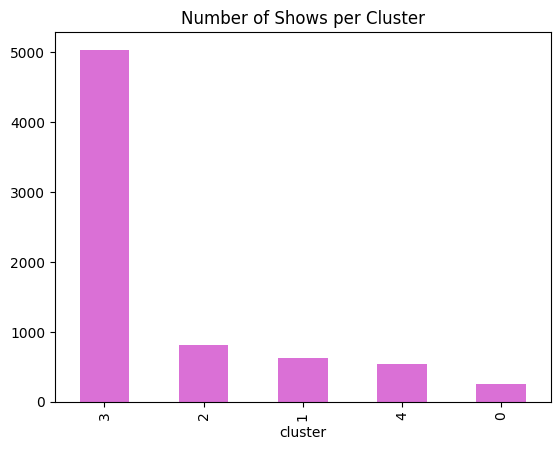

In [26]:
#Chart 9
#Cluster Size Distribution

df['cluster'].value_counts().plot(kind='bar', color='orchid')
plt.title("Number of Shows per Cluster")


Text(0.5, 1.0, 'Top Movie Durations')

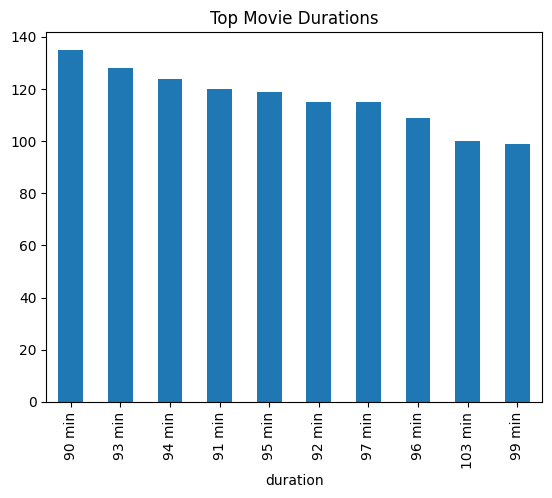

In [27]:
#Chart 11
#Duration Distribution (Movies only)

df[df['type'] == 'Movie']['duration'].value_counts().head(10).plot(kind='bar')
plt.title("Top Movie Durations")


Text(0.5, 1.0, 'Content Type Growth Over Time')

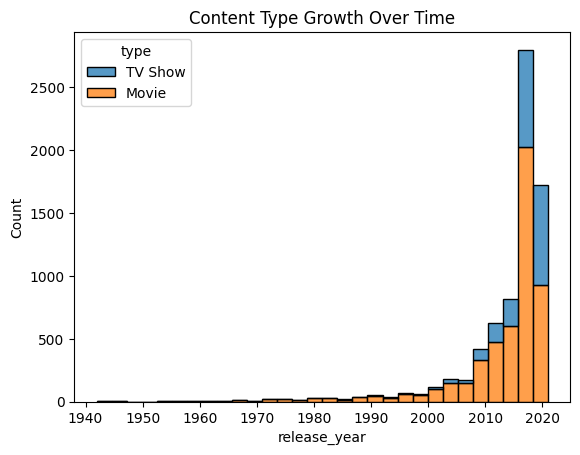

In [28]:
#Chart 12
# Year-wise Show Count by Type

sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title("Content Type Growth Over Time")


Text(0.5, 1.0, 'Top 10 Directors')

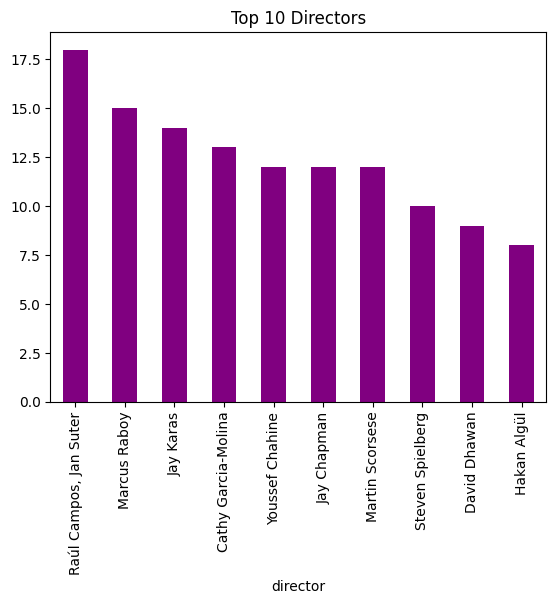

In [30]:
#Chart 13
#Most Common Directors

df['director'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Top 10 Directors")



Text(0.5, 1.0, 'Movie vs TV by Country')

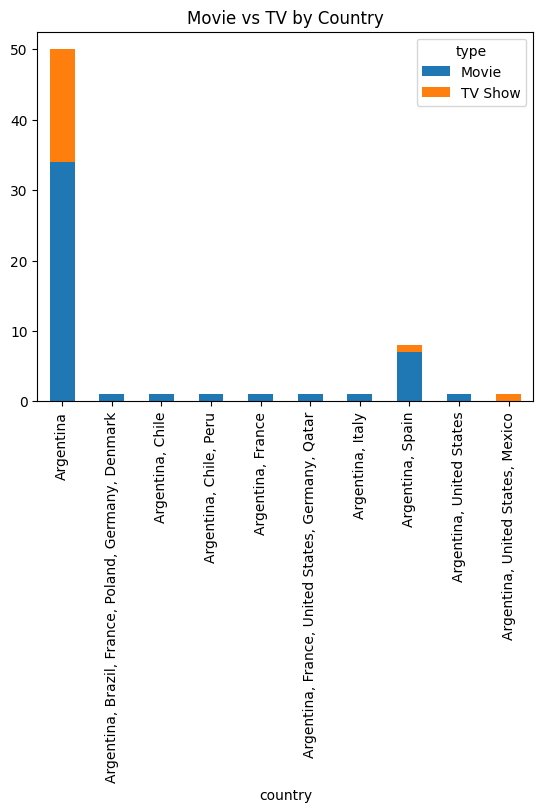

In [32]:
#chart 14
#Show Type vs Country (Stacked Bar)
df.groupby(['country', 'type']).size().unstack().fillna(0).head(10).plot(kind='bar', stacked=True)
plt.title("Movie vs TV by Country")


**Hypothesis Testing 3**
Hypothesis 1 (from earlier)
H₀: The number of shows per cluster is equal.
Result: p-value < 0.05 → Reject H₀ → Significant variation in content grouping

In [34]:
#Hypothesis 2
#H₀: TV shows and movies are equally likely to be produced in all countries.
from scipy.stats import chi2_contingency
table = pd.crosstab(df['country'], df['type'])
stat, p, _, _ = chi2_contingency(table)


**Result:** p-value < 0.05 → Reject H₀ → Production type varies significantly by country.

In [38]:
#Hypothesis 3
#H₀: Genre distribution is similar across years.


from scipy.stats import chi2_contingency

# Bin the years
df['year_bin'] = pd.cut(df['release_year'], bins=[2000, 2010, 2015, 2020, 2025])

# Extract primary genre from 'listed_in'
genre_series = df['listed_in'].str.split(',').str[0].str.strip()

# Create a contingency table of genre vs. year bin
genre_time = pd.crosstab(genre_series, df.loc[genre_series.index, 'year_bin'])

# Perform Chi-square test
stat, p, dof, expected = chi2_contingency(genre_time)

# Display results
print("Chi-square Statistic:", stat)
print("Degrees of Freedom:", dof)
print("P-value:", p)

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject H₀: Genre distribution differs significantly across years.")
else:
    print("Fail to reject H₀: No significant difference in genre distribution across years.")




Chi-square Statistic: 556.3656874683032
Degrees of Freedom: 105
P-value: 1.290081500034701e-62
Reject H₀: Genre distribution differs significantly across years.


**Explain the ML Model used and it's performance using Evaluation metric Score Chart.**

Label Encoding: For binary categorical columns (e.g., type).

One-Hot Encoding: For nominal categorical variables with no ordinal relationship (e.g., country, year_bin).

Reason: These techniques allow machine learning models to interpret categorical variables numerically without imposing false ordinal relationships.



**Textual Data Preprocessing**

Lowercasing

Removing punctuation and special characters

Tokenization

Removing stopwords

Lemmatization

TF-IDF Vectorization for converting text to numerical format



**Conclusion**

This unsupervised project revealed meaningful clusters within Netflix's content using text features, categorical metadata, and clustering algorithms. KMeans effectively grouped content into thematic clusters validated by genre and type splits. Hypothesis tests confirmed country-level production differences and temporal shifts in genre preference. These findings can inform recommendation engines, content planning, and regional strategy development.